In this notebook, I train a Logistic Regression model to set up a baseline for the IMDB review classification task. Following are the steps I made:
* download and extract the dataset
* each review is a separate txt file, I prepare them as train and test dataframes
* use CountVectorizer to convert the data to bag-of-word format
* train and test the model

In [7]:
# !curl -O  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [6]:
# !tar -xf aclImdb_v1.tar.gz

In [5]:
# !rm -r aclImdb/train/unsup

##### Importing necessary libraries

In [82]:
import warnings
warnings.filterwarnings("ignore")

<!-- The dataset has separate directory for train and test. I want  -->

In [55]:
import os, shutil, pathlib, random
import numpy as np
import pandas as pd

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##### Read the reviews and put them in dataframe

In [56]:
def load_data(dirpath):
    score = {'pos':1, 'neg':0}
    data = []    
    for category in ('pos', 'neg'):
        filenames = os.listdir(dirpath/category)
        # print(len(filenames))
        for fname in filenames:
            # print(fname)
            # file = open(filename, encoding="utf8")
            # review = file.read()
            with open(os.path.join(dirpath/category, fname), "r", encoding="utf8") as f:
                review = f.read()
                # print(review)
                data.append([review, score[category]])
            # break
        # break
    # print(data)
    np.random.shuffle(data)
    data = pd.DataFrame(data, columns=['text', 'sentiment'])
    return data

In [57]:
basedir = pathlib.Path('aclImdb')
train_dir = basedir/'train'
test_dir = basedir/'test'
train_data = load_data(train_dir)
test_data = load_data(test_dir)
print("train data len: ", len(train_data))
print("test data size: ", len(test_data))

train data len:  25000
test data size:  25000


In [85]:
# train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=43)
# print("train data len: ", len(train_data))
# print("val data size: ", len(val_data))

Checking the first few reviews

In [63]:
train_data.head()

,text,sentiment
16715,"Now i really liked this movie, it was so funny...",1
18404,this is the best sci-fi that I have seen in my...,1
24558,Welcome to movie 17 on the chilling classics 5...,0
24922,I first saw the trailer for Frailty on Yahoo M...,1
3364,Poor Paul Mercurio. After landing the role of ...,0


CountVectorizer takes care of tokenization and vocabulary creation. I'll fit the vectorizer on the train set and use it for both train and test set.

In [75]:
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(train_data['text'])

vectorized_train = vectorizer.transform(train_data['text'])
vectorized_val  = vectorizer.transform(val_data['text'])
vectorized_test  = vectorizer.transform(test_data['text'])

In [86]:
# type(vectorized_train)

#### Baseline model
My baseline model is a simple LogisticRegression model.

In [83]:
model = LogisticRegression(random_state=11, max_iter=200)
model.fit(vectorized_train, train_data["sentiment"])
score = model.score(vectorized_test, test_data["sentiment"])
print("Accuracy:", score)

Accuracy: 0.85792


> Note: with the baseline model, we acieved an accuracy of around 85.8%.

Plotting confusion matrix to check the model performance for each category

In [79]:
from sklearn import metrics

sentiment_pred = model.predict(vectorized_test)
cnf_matrix = metrics.confusion_matrix(test_data['sentiment'], sentiment_pred)
cnf_matrix

array([[10788,  1712],
       [ 1840, 10660]], dtype=int64)

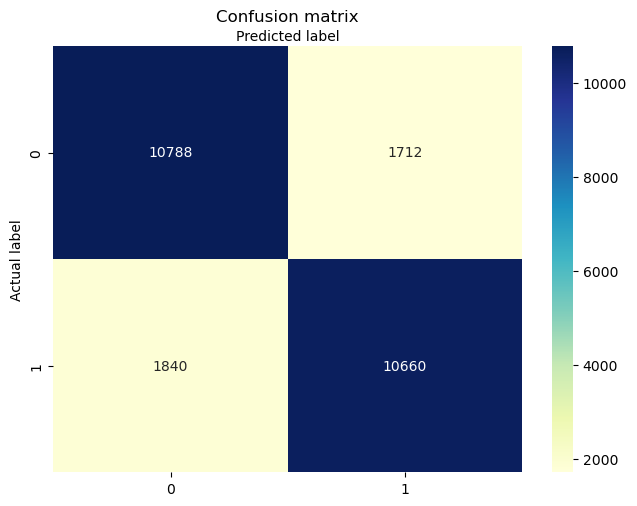

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

> Note: checking the confusion matrix can help to identify if the model is more making mistakes for a specific cetegory or not. In this case, the data being balanced, this does not seem to be an issue.